# Ejercicio regresión lineal

A partir de los datos sobre el precio de viviendas y otra información sobre suburbios de la ciudad de Boston (archivo Boston_data.csv):

a)       Estudiar gráficamente qué variables parecen tener más relación con el precio de la vivienda. Escoger dos o tres de ellas y hacer una regresión lineal simple.

b)      ¿Qué variable da mejor resultado?

c)       Dibujar la distribución de los residuos normalizados (y el plot residuos vs valor predicho) y comentar qué información se puede extraer de éstos respecto a la calidad del ajuste realizado y los requisitos supuestos.

###### Contenido del conjunto de datos:

crim: ratio de criminalidad per cápita de cada ciudad.

zn: Proporción de zonas residenciales con edificaciones de más de 25.000 pies cuadrados.

indus: proporción de zona industrializada.

chas: Si hay río en la ciudad (= 1 si hay río; 0 no hay).

nox: Concentración de óxidos de nitrógeno (partes per 10 millón).

rm: promedio de habitaciones por vivienda.

age: Proporción de viviendas ocupadas por el propietario construidas antes de 1940.

dis: Media ponderada de la distancias a cinco centros de empleo de Boston.

rad: Índice de accesibilidad a las autopistas radiales.

tax: Tasa de impuesto a la propiedad en unidades de $10,000.

ptratio: ratio de alumnos/profesor por ciudad.

black: 1000(Bk - 0.63)^2 donde Bk es la proporción de gente de color por ciudad.

lstat: porcentaje de población en condición de pobreza.

medv: Valor mediano de las casas ocupadas por el dueño en unidades de $1000s.

#### a) Estudiar gráficamente qué variables parecen tener más relación con el precio de la vivienda. Escoger dos o tres de ellas y hacer una regresión lineal simple.

Lo primero que haremos será un análisis estadístico básico de todas las variables:

In [1]:
#Preparamos el entorno:
library(data.table)
Boston <- read.csv(file="Boston_data.csv", sep=",", head=TRUE)

In [2]:
head(Boston)

X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
tail(Boston)

,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,501,0.22438,0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,503,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,504,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,506,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
names(Boston)

[1] "X"       "crim"    "zn"      "indus"   "chas"    "nox"     "rm"     
 [8] "age"     "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"  
[15] "medv"

In [5]:
summary(Boston)

       X              crim                zn             indus      
 Min.   :  1.0   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:127.2   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :253.5   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :253.5   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:379.8   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :506.0   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      chas              nox               rm             age        
 Min.   :0.00000   Min.   :0.3850   Min.   :3.561   Min.   :  2.90  
 1st Qu.:0.00000   1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02  
 Median :0.00000   Median :0.5380   Median :6.208   Median : 77.50  
 Mean   :0.06917   Mean   :0.5547   Mean   :6.285   Mean   : 68.57  
 3rd Qu.:0.00000   3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08  
 Max.   :1.00000   Max.   :0.8710   Max.   :8.780   Max.   :100.00  
      dis              rad        

In [7]:
#A continuación descartamos la variable catégorica CHAS y el índice X
boston_dt <- as.data.table(Boston)
boston_dt[, c('X','chas') := NULL]

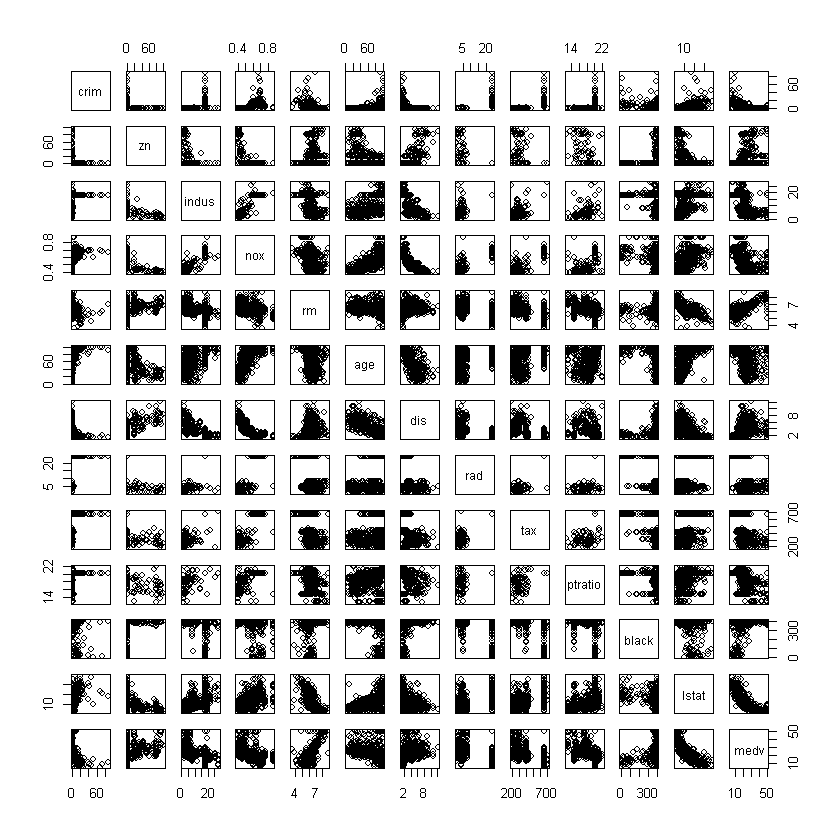

In [8]:
pairs(boston_dt)

Dado que hay muchas variables voy a mostrarlas por grupos de 2

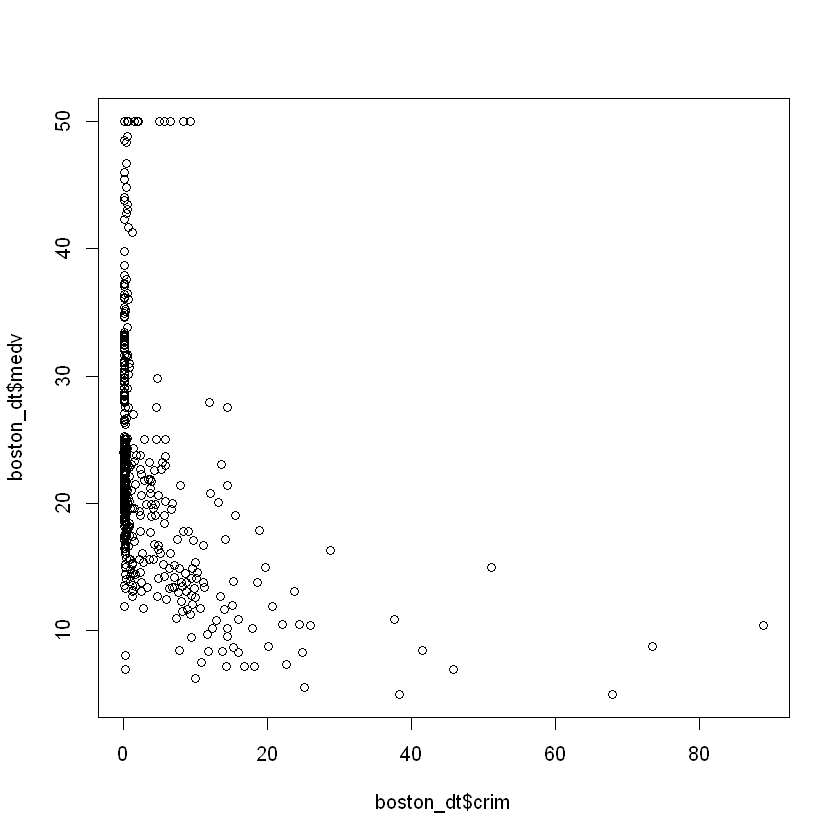

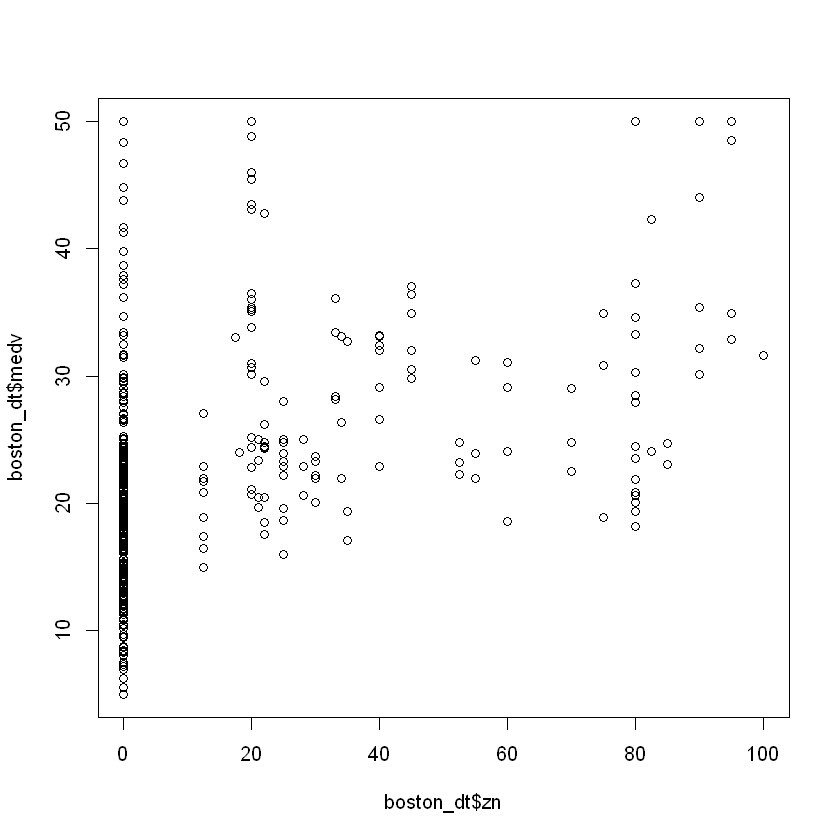

In [9]:
plot(boston_dt$crim, boston_dt$medv)
plot(boston_dt$zn, boston_dt$medv)

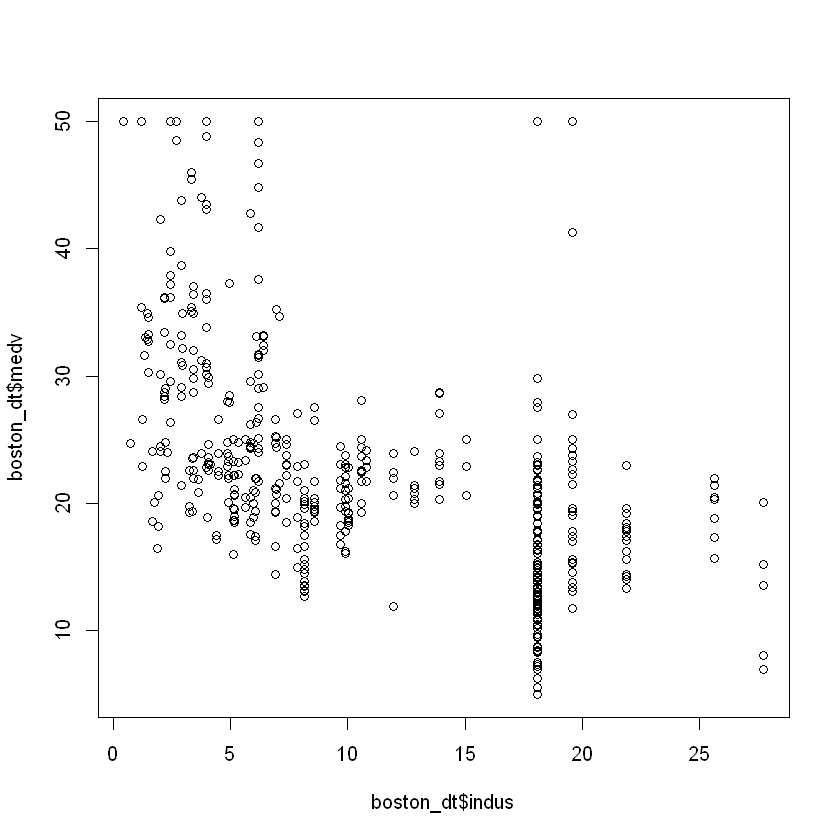

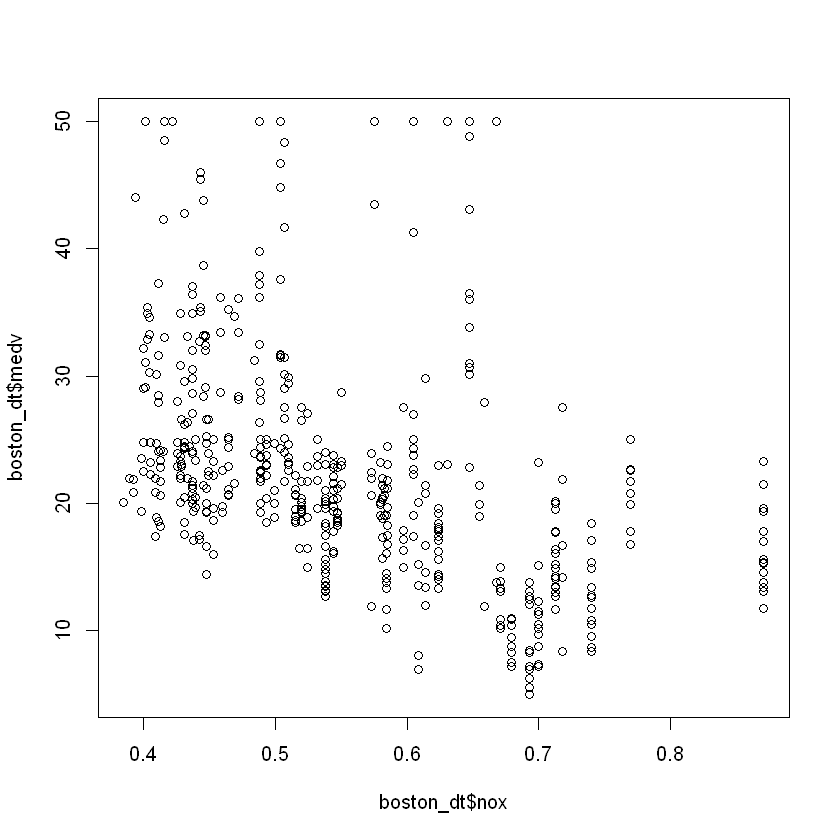

In [10]:
plot(boston_dt$indus, boston_dt$medv)
plot(boston_dt$nox, boston_dt$medv)

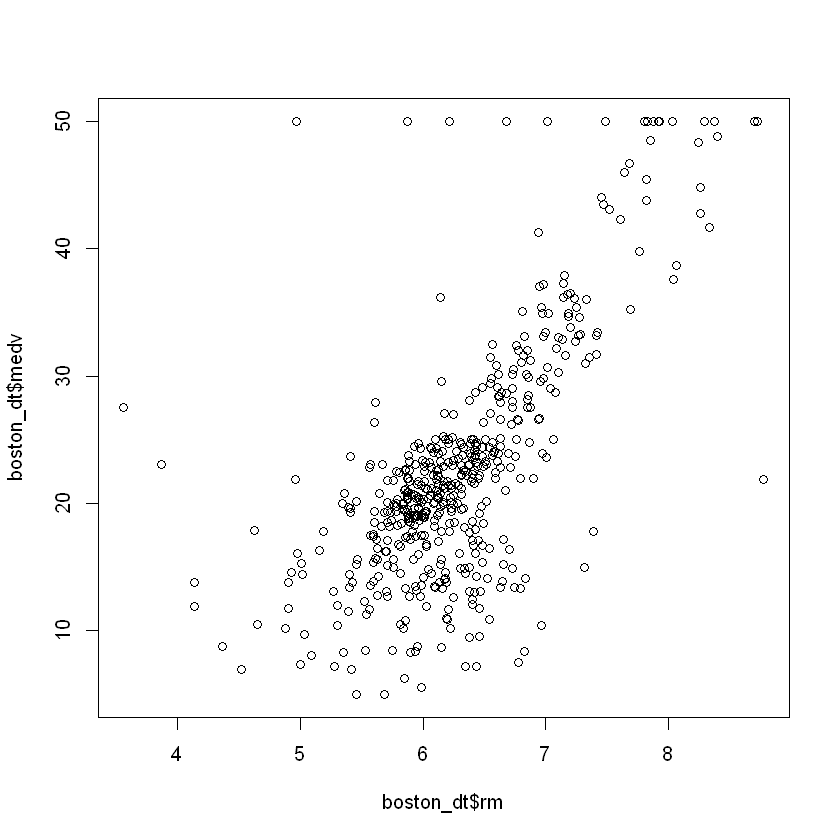

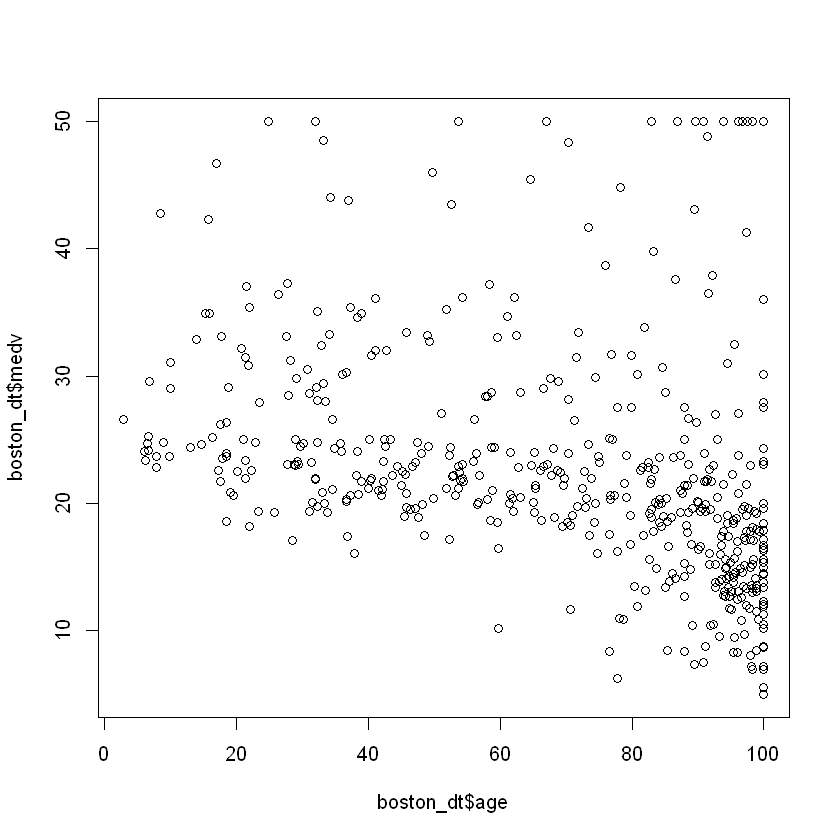

In [11]:
plot(boston_dt$rm, boston_dt$medv)
plot(boston_dt$age, boston_dt$medv)

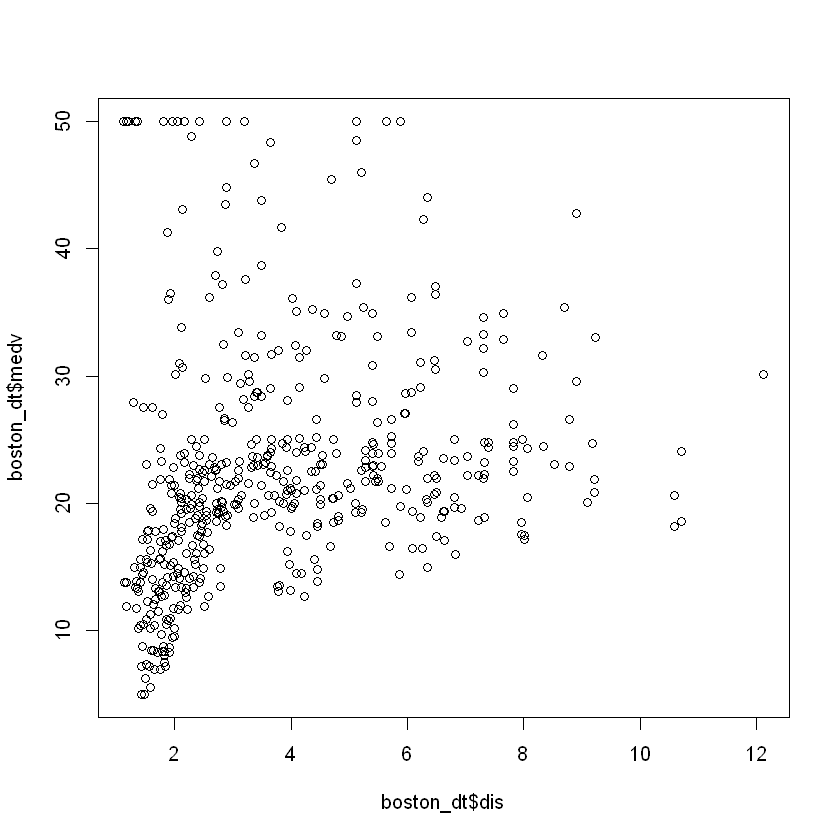

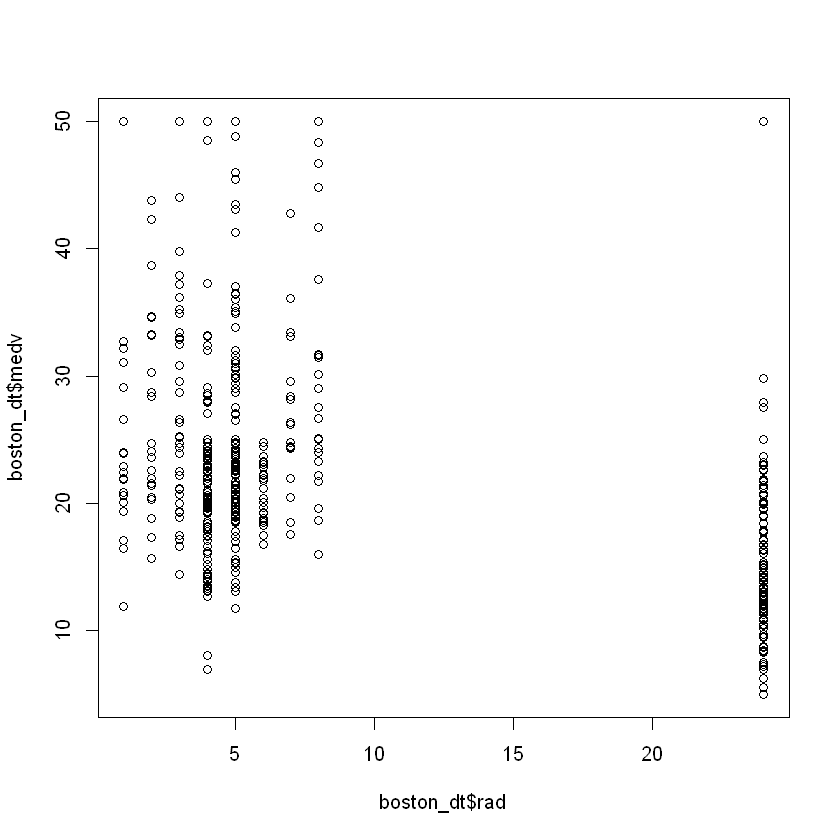

In [12]:
plot(boston_dt$dis, boston_dt$medv)
plot(boston_dt$rad, boston_dt$medv)

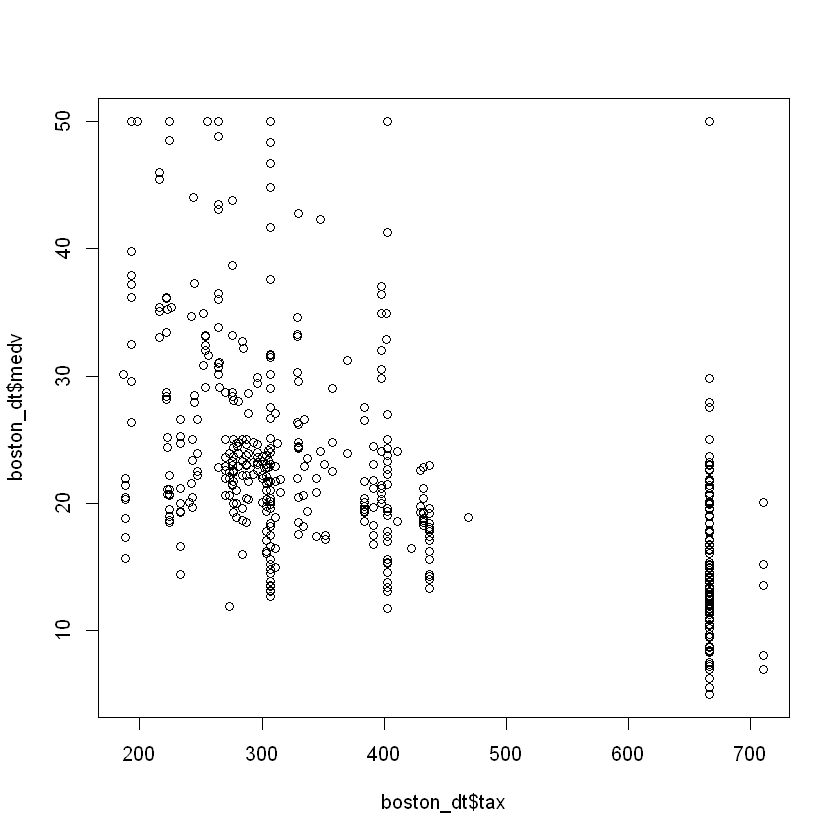

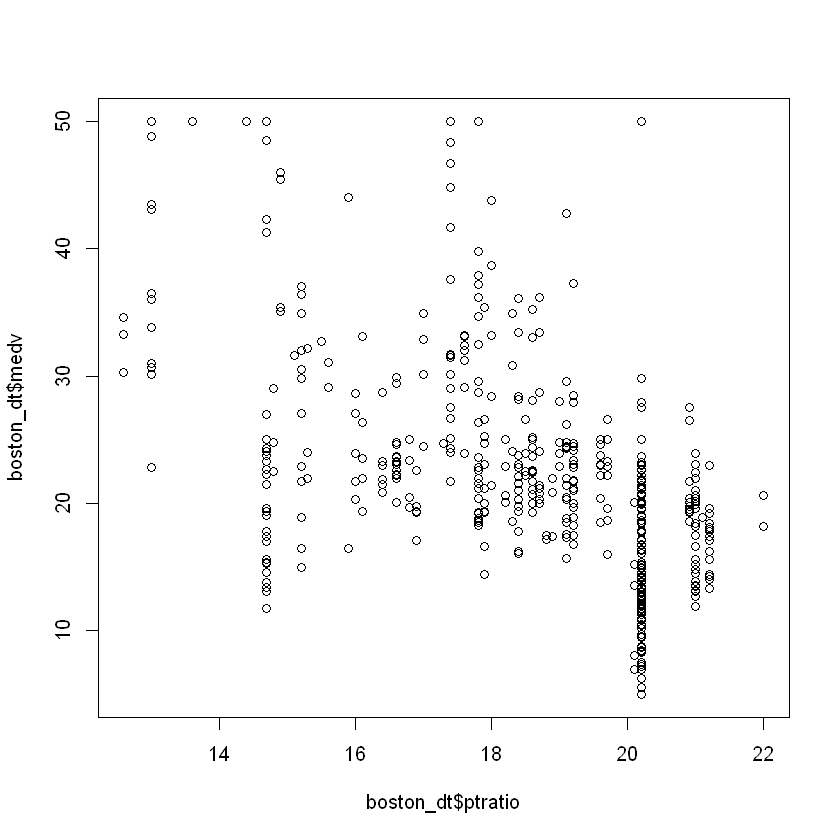

In [13]:
plot(boston_dt$tax, boston_dt$medv)
plot(boston_dt$ptratio, boston_dt$medv)

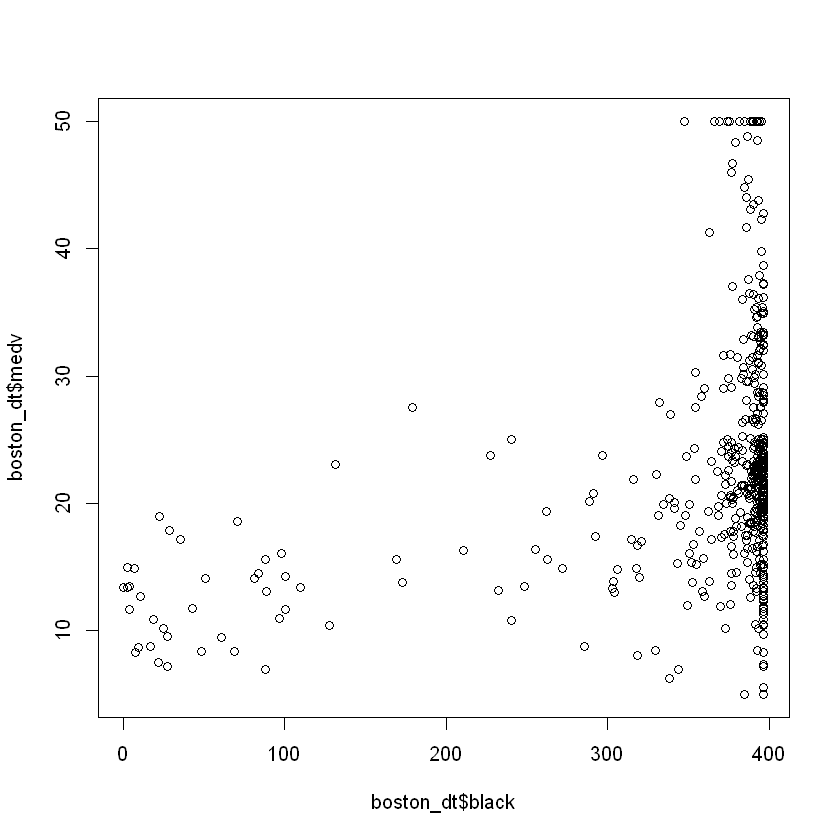

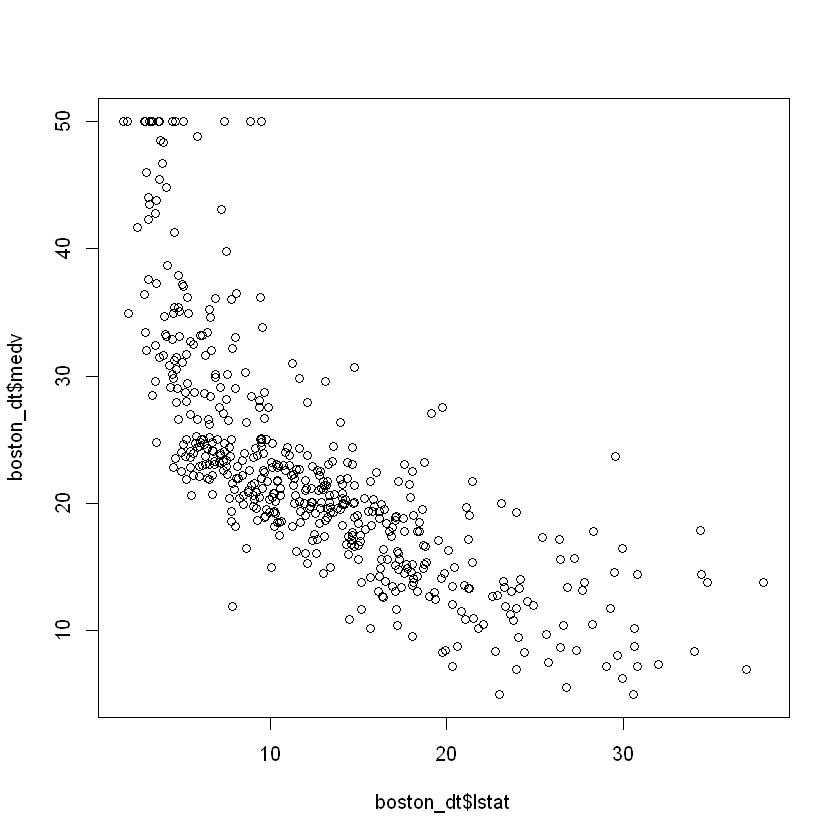

In [14]:
plot(boston_dt$black, boston_dt$medv)
plot(boston_dt$lstat, boston_dt$medv)

#### A través de la observación visual podemos observar cierta dependencia lineal entre las variables, rm - age - dis - lstat

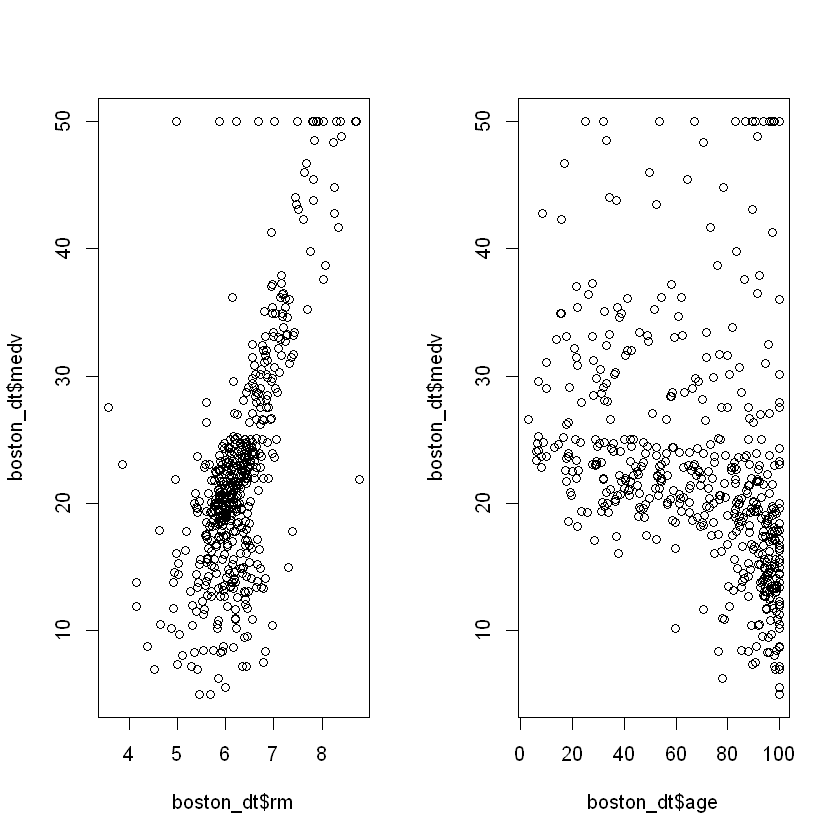

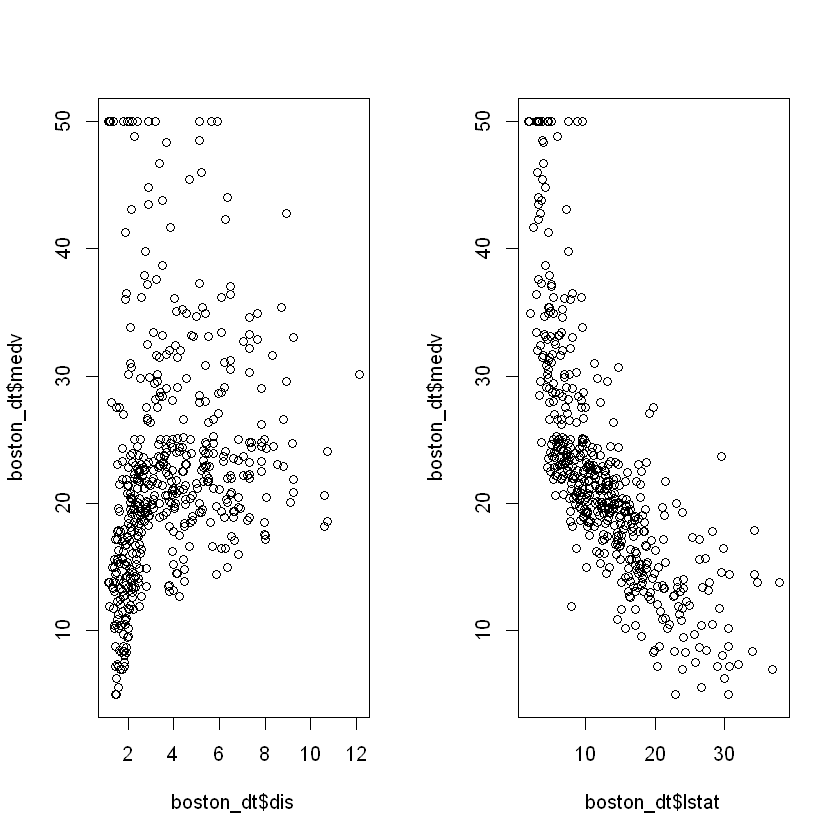

In [15]:
par(mfrow=c(1,2))
plot(boston_dt$rm, boston_dt$medv)
plot(boston_dt$age, boston_dt$medv)
plot(boston_dt$dis, boston_dt$medv)
plot(boston_dt$lstat, boston_dt$medv)

Analizamos las distribuciones de frecuencias de las 4 variables seleccionadas:

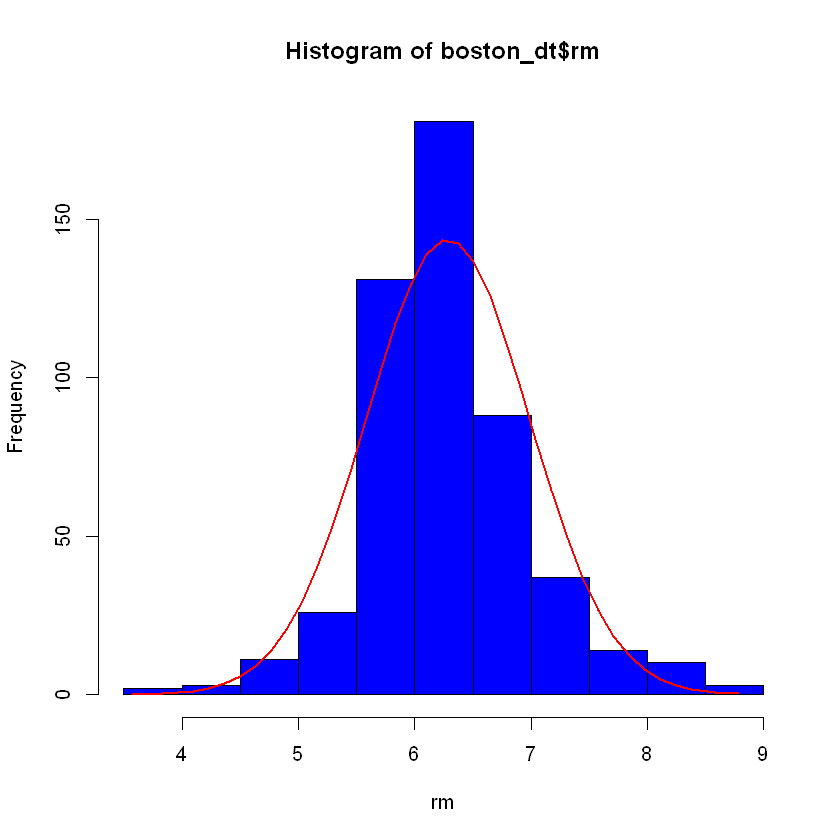

In [16]:
hT <- hist(boston_dt$rm, xlab="rm", ylab="Frequency", col="blue")
xfitT<-seq(min(boston_dt$rm),max(boston_dt$rm),length=40) 
yfitT<-dnorm(xfitT,mean=mean(boston_dt$rm),sd=sd(boston_dt$rm))
yfitT <- yfitT*diff(hT$mids[1:2])*length(boston_dt$rm) 
lines(xfitT, yfitT, col="red", lwd=2)

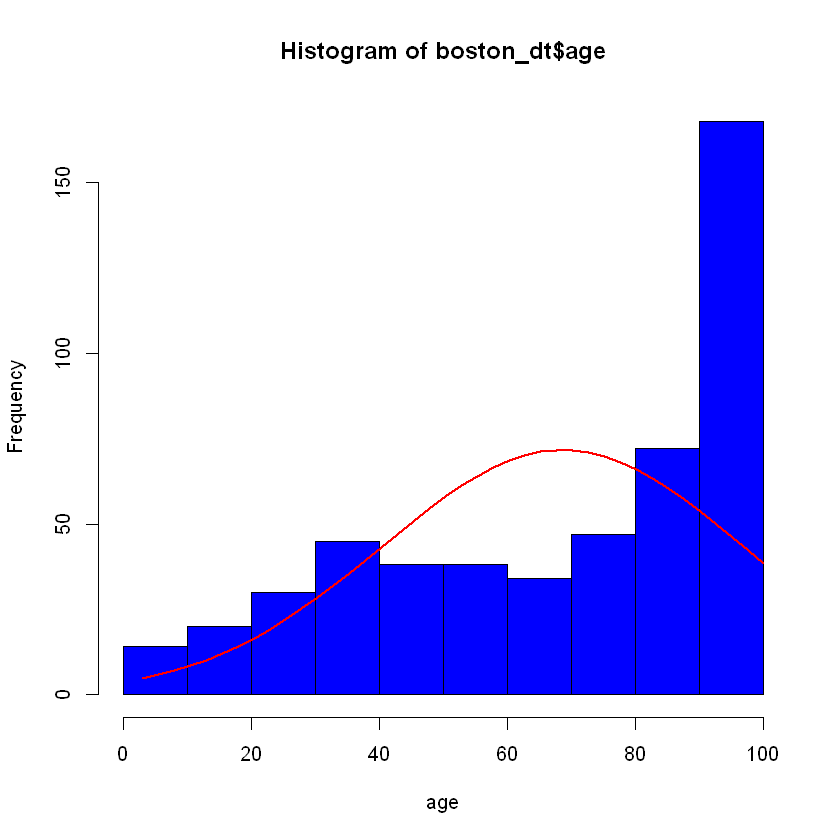

In [17]:
hT <- hist(boston_dt$age, xlab="age", ylab="Frequency", col="blue")
xfitT<-seq(min(boston_dt$age),max(boston_dt$age),length=40) 
yfitT<-dnorm(xfitT,mean=mean(boston_dt$age),sd=sd(boston_dt$age))
yfitT <- yfitT*diff(hT$mids[1:2])*length(boston_dt$age) 
lines(xfitT, yfitT, col="red", lwd=2)

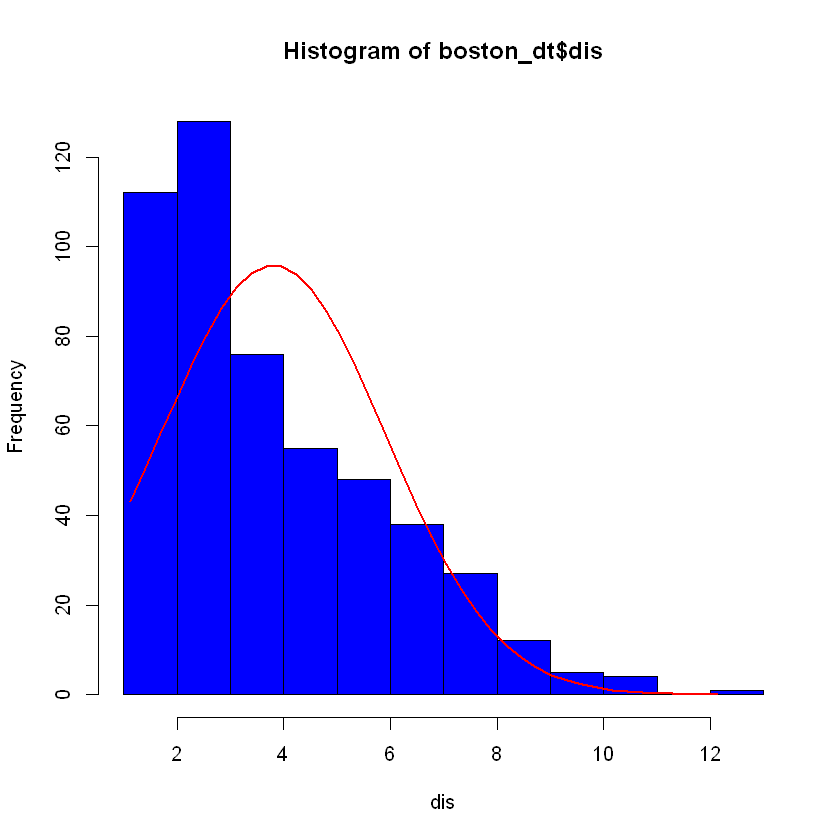

In [18]:
hT <- hist(boston_dt$dis, xlab="dis", ylab="Frequency", col="blue")
xfitT<-seq(min(boston_dt$dis),max(boston_dt$dis),length=40) 
yfitT<-dnorm(xfitT,mean=mean(boston_dt$dis),sd=sd(boston_dt$dis))
yfitT <- yfitT*diff(hT$mids[1:2])*length(boston_dt$dis) 
lines(xfitT, yfitT, col="red", lwd=2)

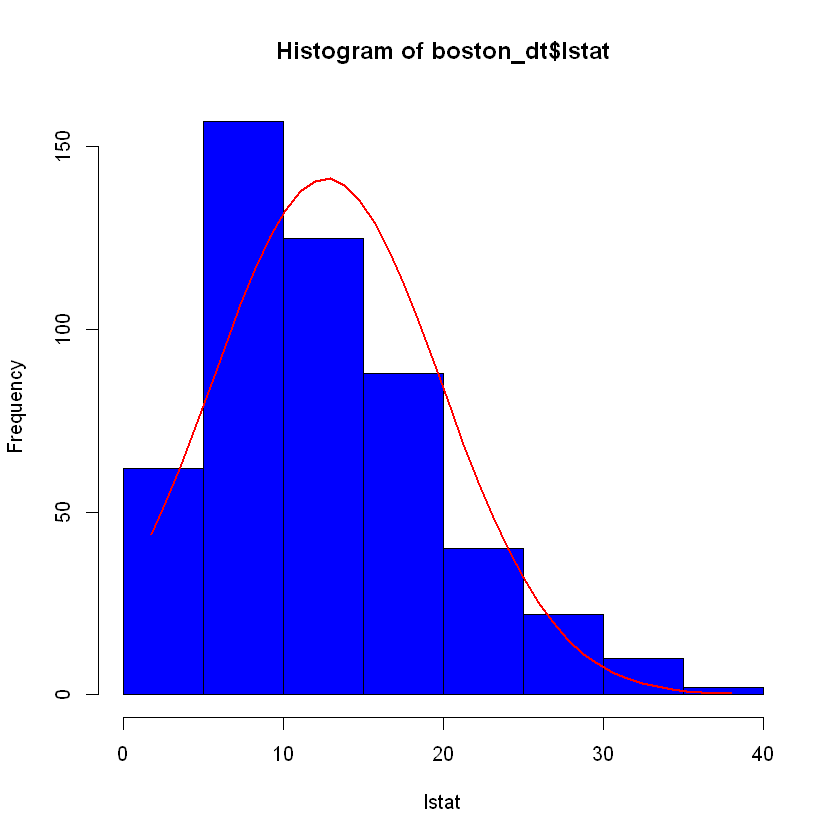

In [19]:
hT <- hist(boston_dt$lstat, xlab="lstat", ylab="Frequency", col="blue")
xfitT<-seq(min(boston_dt$lstat),max(boston_dt$lstat),length=40) 
yfitT<-dnorm(xfitT,mean=mean(boston_dt$lstat),sd=sd(boston_dt$lstat))
yfitT <- yfitT*diff(hT$mids[1:2])*length(boston_dt$lstat) 
lines(xfitT, yfitT, col="red", lwd=2)

#### Descartamos la opción de la variable AGE y DIS a través del análisis de la distribución de frecuencias, vemos una clara NO normalidad.

#### Generamos la regresión lineal simple con las variables RM y LSTAT

In [20]:
modelo_RM <- lm(data = Boston, formula = medv ~ rm)
modelo_LSTAT <- lm(data = Boston, formula = medv ~ lstat)

In [22]:
#Analizamos el resultado
summary(modelo_RM)
summary(modelo_LSTAT)


Call:
lm(formula = medv ~ rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
rm             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


#### b)      ¿Qué variable da mejor resultado?

En la información que observamos en el el summary para ambos modelos se observa que el p-value del estadístico F es muy pequeño, indicando que al menos uno de los predictores del modelo está significativamente relacionado con la variable respuesta (MEDV). 

Al tratarse de modelos de regresión simple, el p-value de estadístico F es el mismo que el p-value del estadístico t del único predictor incluido en el modelo (lstat o rm).

Evaluaremos los modelos a partir de los valores RSE o del valor R2 que vemos en el summary:

### RSE:
#### RM:
    En promedio, las predicciones del modelo se alejan 6,616 unidades del valor real.
    Teniendo en cuenta que el valor promedio de la variable respuesta medv es de 22,53, RSE es del 29,37%.
#### LSTAT:
    En promedio, las predicciones del modelo se alejan 6,216 unidades del valor real.
    Teniendo en cuenta que el valor promedio de la variable respuesta medv es de 22,53, RSE es del 27,59%.

### R^2: 
#### RM:
    El predictor rm empleado en el modelo es capaz de explicar el 48,35% de la variabilidad en el precio de las viviendas.
#### LSTAT:
    El predictor lstatus empleado en el modelo es capaz de explicar el 54,44% de la variabilidad en el precio de las viviendas.

La ventaja de R^2 de lstat sobre rm nos indica que el modelo_LSTAT se ajusta más (por poco que sea) que el modelo_RM, por lo tanto la variable que nos daría mejor resultado para una regresión lineal simple sería LSTAT.

### Coeficientes: 
Los dos coeficientes de regresión (β0 y β1) estimados por el modelo son significativos y se pueden interpretar como:

Intercept(β0): El valor promedio del precio de la vivienda cuando el lstatus es 0, <b>es de 34.5538 unidades</b>.

Predictor lstat(β1): por cada unidad que se incrementa el predictor lstat el precio de la vivienda <b>disminuye en promedio 0.9500 unidades.</b>


## Modelo:
<center>precio medio vivienda = 34,55 − 0,95 * lstat</center>

<center><b>Y = 34,55 − 0,95 * X</b></center>

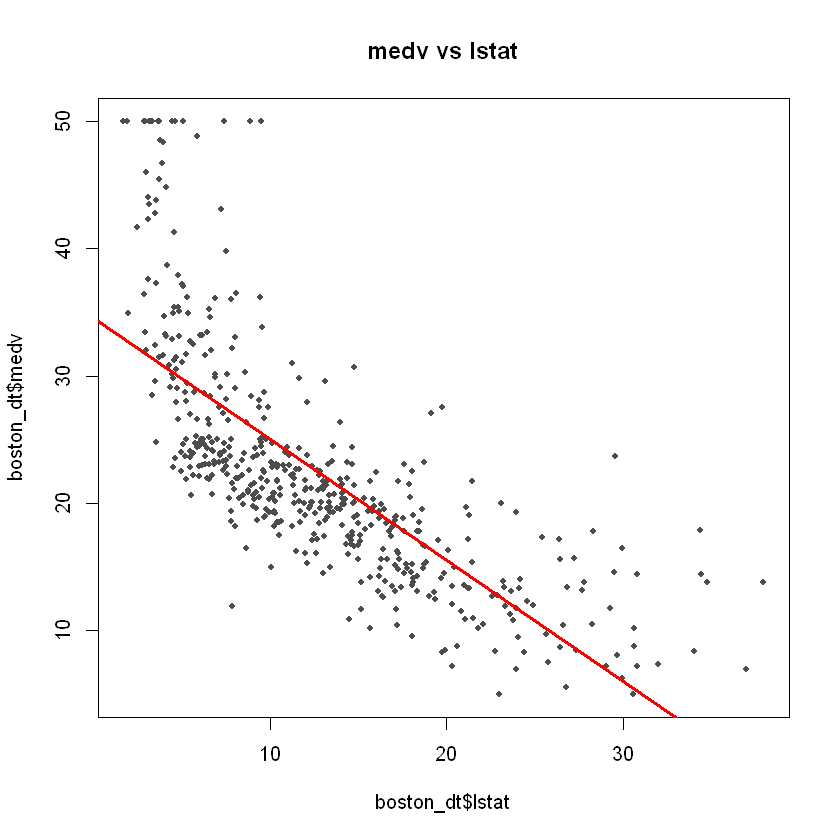

In [23]:
plot(x = boston_dt$lstat, y = boston_dt$medv, main = "medv vs lstat", pch = 20, col = "grey30")
abline(modelo_LSTAT, lwd = 3, col = "red")

La representación gráfica del modelo nos muestra que la relación entre ambas variables estudiadas no es del todo lineal, lo que apunta a que otro tipo de modelo podría explicar mejor la relación.
Por ejemplo una regresión polinomial o con splines entre 0 y 10.

####  c)       Dibujar la distribución de los residuos normalizados (y el plot residuos vs valor predicho) y comentar qué información se puede extraer de éstos respecto a la calidad del ajuste realizado y los requisitos supuestos.

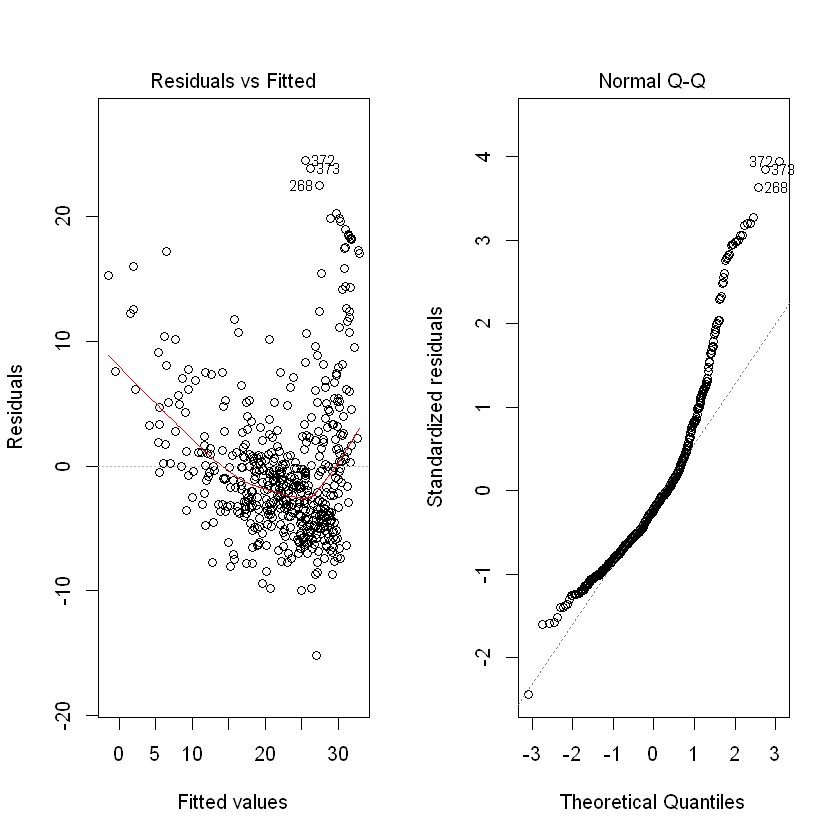

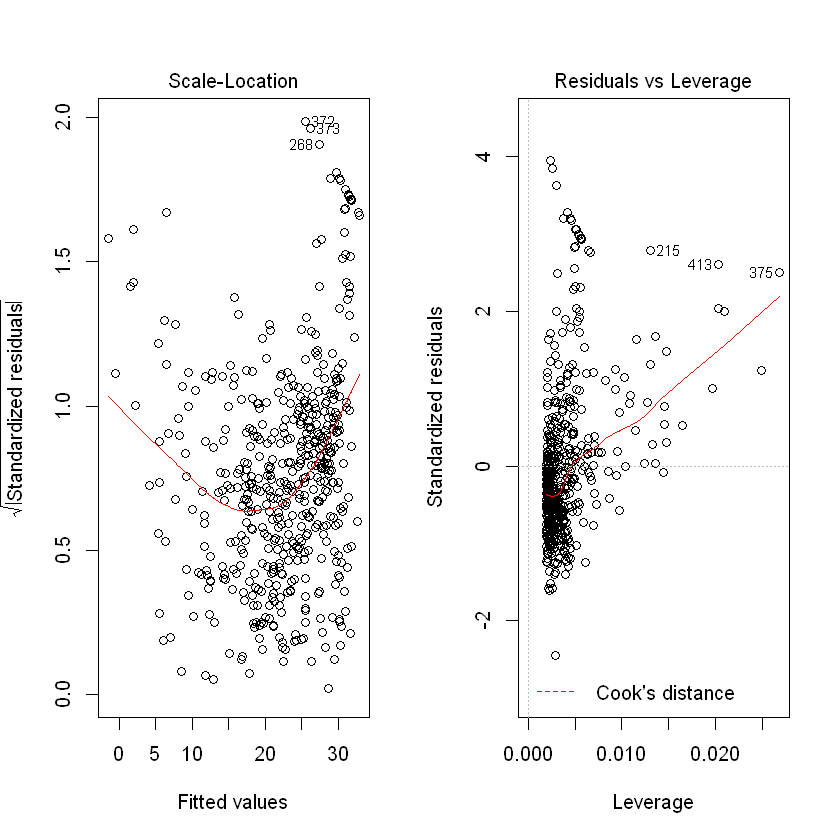

In [24]:
par(mfrow=c(1,2))
plot(modelo_LSTAT)

Al aplicar la función plot sobre el objeto que contiene la información del modelo, obtenemos 4 gráficos que nos ayudan para la validación del modelo. Estos gráficos son:
    
    
    
- Valores predichos frente a residuos (plot1)

- Gráfico Q-Q de normalidad (plot2)
<br>El gráfico Q- Q, por su parte, se utiliza para contrastar la normalidad de los residuos. Lo deseable es que los residuos estandarizados estén lo más cerca posible a la línea punteada que aparece en el gráfico.

- Valores predichos frente a raíz cuadrada de los residuos estandarizados (en valor absoluto) - plot3. 
<br>1 y 3 --> Contrastan gráficamente la independencia, la homocedasticidad y la linealidad de los residuos. Idealmente, los residuos deben estar aleatoriamente distribuidos a lo largo del gráfico, sin formar ningún tipo de patrón.

- Residuos estandarizados frente a leverages (plot4).
<br>El gráfico de residuos estandarizados frente a leverages se utiliza para detectar puntos con una influencia importante en el cálculo de las estimaciones de los parámetros. En caso de detectarse algún punto fuera de los límites que establecen las líneas discontinuas debe estudiarse este punto de forma aislada para detectar, por ejemplo, si la elevada importancia de esa observación se debe a un error.

No parece que los residuos sigan una distribución Normal. Vamos a confirmar si esto es así mediante métodos analíticos (por ejemplo Kolmogorov-Smirnov).



Como conclusión de los 4 gráficos extraemos que que no hay varianza constante. La distribución de los residuos no sigue una normal. Algunas observaciones tienen un residuo estandarizado absoluto elevado lo que es indicativo de outlier y dado que los valores de Cook mayores de 1 se consideran influyentes, vemos la gran catidad de estos que hay.
